In [4]:
import json
import matplotlib.pyplot as plt
import os
import numpy as np
import ast
# Function to save the Plots
def save_fig(fig_id,path, tight_layout=True, fig_extension="png", resolution=300):
    path = os.path.join(path, fig_id + "." + fig_extension)
    print("Saving figure", fig_id)
    if tight_layout:
        plt.tight_layout()
    plt.savefig(path, format=fig_extension, dpi=resolution)

In [3]:
# Define the Paths 

# The Path with the Trials
TRIALS_ROOT = "F:/Thesis/2020/TRIALS 2020/"
# The Trial IDs to be compared with each other
IDs = ["ID_104","ID_105","ID_106"]
# The Path to save the Images
IMG_PATH = "F:/Thesis/2020/TRIALS 2020/Comparisons/bin_acc/"
os.makedirs(IMG_PATH, exist_ok=True)
# The Title under which the Images are saved
comparison_title = "ID_101_vs_102_vs_103"
# The type of metric to plot against each other
metric = "binary_accuracy"

In [6]:


def import_and_draw_history(TRIALS_ROOT,IMG_PATH,IDs,title,metric):
# List of all histories of IDs
    histories = []
    val_metric = str("val_"+metric)
# Contains a string for the Legend with the Lowest metric and the Epoch
    lowest_val_metric = []
    lowest_metric = []
# Reads in the histories and turns them into a dictionary
    for ID in IDs:
        HISTORY_PATH = os.path.join(TRIALS_ROOT,ID,str("history_"+ID))
        with open(HISTORY_PATH) as his: 
            history = json.loads(his.read())
# Turn the string dictionary into a dictionary and append it
            history = ast.literal_eval(history)
            histories.append(history)
# Get the Indices (Epochs) of the metrices and their values, to a 3 decimal number 
# and append those as string
            val_metric_index_min = np.argmin(history[val_metric])
            val_metric_min = min(history[val_metric])
            val_metric_min = '%.3f' %val_metric_min
            last_val_metric = '%.3f'%history[val_metric][-1]
            lowest_val_metric.append(str("Lowest"+val_metric+ "is:"+val_metric_min+", at Epoch:"+
                                       str(val_metric_index_min)+" last " +val_metric+" :"+
                                  str(last_val_metric)))
            metric_index_min = np.argmin(history[metric])
            metric_min = min(history[metric])
            metric_min = '%.3f' %metric_min
            last_metric = '%.3f'%history[metric][-1]
            lowest_metric.append(str("Lowest "+metric+ " is:"+metric_min+", at Epoch:"+
                                       str(metric_index_min)+" last " + metric+" :"+
                                  str(last_metric))) 
# Make the Legend and combine the IDs with the Strings of the lowest metrices            
    val_metric_legend = list(zip(IDs,lowest_val_metric))
    metric_legend = list(zip(IDs,lowest_metric))
# Plot and Save
    for history in histories:
        plt.plot(history[val_metric])
    plt.legend(val_metric_legend, loc='upper right')
    plt.title(val_metric)
    plt.ylabel(val_metric)
    plt.xlabel('Epoch')
    save_fig(title+val_metric,IMG_PATH)
    img_ = plt.show()
    
    for history in histories:
        plt.plot(history[metric])
    plt.legend(metric_legend, loc='upper right')
    plt.title(metric)
    plt.ylabel(metric)
    plt.xlabel('Epoch')
    save_fig(title+metric,IMG_PATH)
    img_ = plt.show()
    return histories








ID_301_vs_ID_302_vs_ID_303
Saving figure ID_301_vs_ID_302_vs_ID_303val_loss


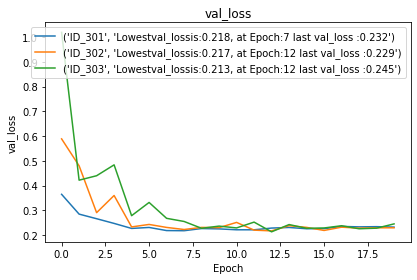

Saving figure ID_301_vs_ID_302_vs_ID_303loss


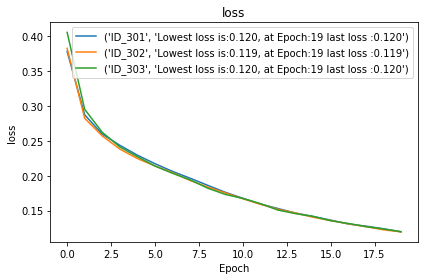

ID_304_vs_ID_305_vs_ID_306
Saving figure ID_304_vs_ID_305_vs_ID_306val_loss


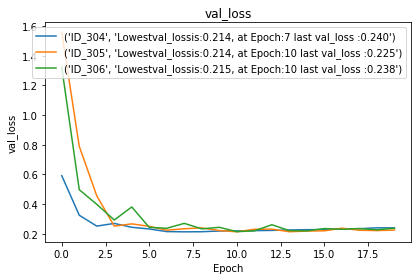

Saving figure ID_304_vs_ID_305_vs_ID_306loss


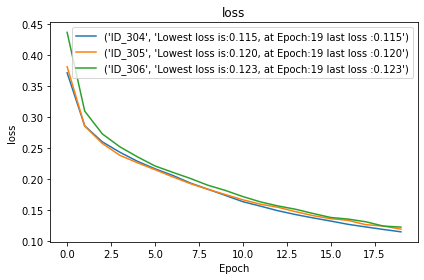

ID_307_vs_ID_308_vs_ID_309
Saving figure ID_307_vs_ID_308_vs_ID_309val_loss


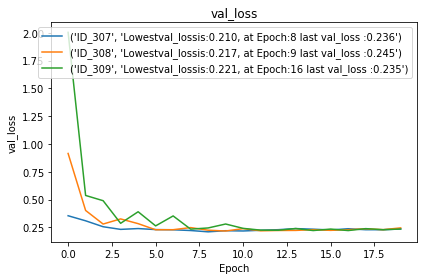

Saving figure ID_307_vs_ID_308_vs_ID_309loss


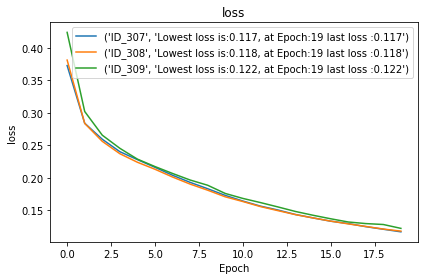

ID_310_vs_ID_311_vs_ID_312
Saving figure ID_310_vs_ID_311_vs_ID_312val_loss


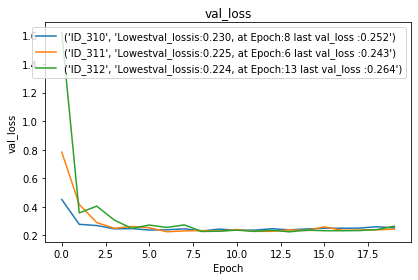

Saving figure ID_310_vs_ID_311_vs_ID_312loss


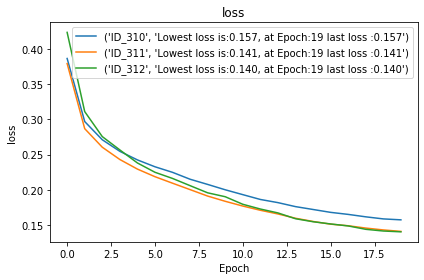

ID_313_vs_ID_314_vs_ID_315
Saving figure ID_313_vs_ID_314_vs_ID_315val_loss


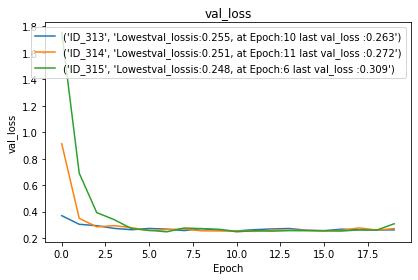

Saving figure ID_313_vs_ID_314_vs_ID_315loss


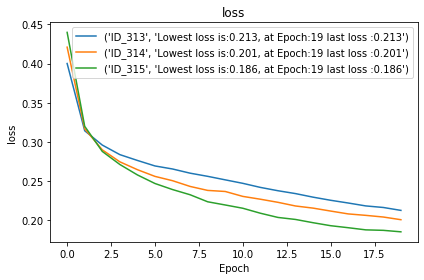

ID_316_vs_ID_317_vs_ID_318
Saving figure ID_316_vs_ID_317_vs_ID_318val_loss


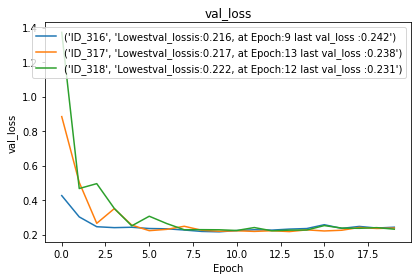

Saving figure ID_316_vs_ID_317_vs_ID_318loss


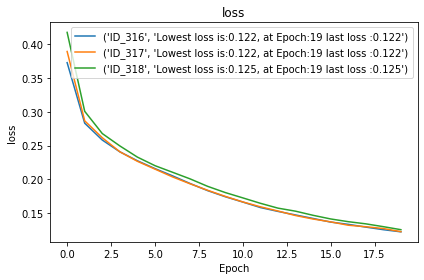

In [7]:
# dice_coef
# binary_accuracy
metric = "loss"

for i in range(0,18,3):
    IDs = [str("ID_"+str(i+301)),str("ID_"+str(i+302)),str("ID_"+str(i+303))]
    comparison_title = IDs[0]+"_vs_"+IDs[1]+"_vs_"+IDs[2]

    print(comparison_title)
    histories = import_and_draw_history(TRIALS_ROOT,IMG_PATH,IDs,comparison_title,metric)
    
    

In [7]:
metric = "binary_accuracy"

all_ids = []
for i in range(1,19,1):
    all_ids.append("ID_"+ str(i+300))
    
print(all_ids)
def get_mins(TRIALS_ROOT,IDs,metric):
    histories = []
    val_metric = str("val_"+metric)
    # Contains a string for the Legend with the Lowest metric and the Epoch
    lowest_val_metric = []
    lowest_metric = []
    # Reads in the histories and turns them into a dictionary
    for ID in IDs:
        HISTORY_PATH = os.path.join(TRIALS_ROOT,ID,str("history_"+ID))
        with open(HISTORY_PATH) as his: 
            history = json.loads(his.read())
    # Turn the string dictionary into a dictionary and append it
            history = ast.literal_eval(history)
            histories.append(history)
    # Get the Indices (Epochs) of the metrices and their values, to a 3 decimal number 
    # and append those as string
            val_metric_index_min = np.argmin(history[val_metric])
            val_metric_min = min(history[val_metric])
            val_metric_min = '%.5f' %val_metric_min
            last_val_metric = '%.5f'%history[val_metric][-1]
            lowest_val_metric.append(val_metric_min)
            metric_index_min = np.argmin(history[metric])
            metric_min = min(history[metric])
            metric_min = '%.5f' %metric_min
            last_metric = '%.5f'%history[metric][-1]
            lowest_metric.append(metric_min) 
    min_metric=min(lowest_metric)
    min_index_metric = np.argmin(lowest_metric)
    print("Lowest "+ metric+ " reached at: "+ min_metric + " with Model: " +IDs[min_index_metric])
    min_val_metric=min(lowest_val_metric)
    min_index_val_metric = np.argmin(lowest_val_metric)
    print("Lowest "+ val_metric+ " reached at: "+ min_val_metric + " with Model: " +IDs[min_index_val_metric])
metric = "dice_coef"        
get_mins(TRIALS_ROOT,all_ids,metric)

['ID_301', 'ID_302', 'ID_303', 'ID_304', 'ID_305', 'ID_306', 'ID_307', 'ID_308', 'ID_309', 'ID_310', 'ID_311', 'ID_312', 'ID_313', 'ID_314', 'ID_315', 'ID_316', 'ID_317', 'ID_318']
Lowest dice_coef reached at: 0.70607 with Model: ID_306
Lowest val_dice_coef reached at: 0.26468 with Model: ID_309


In [8]:
def get_maxs(TRIALS_ROOT,IDs,metric):
    histories = []
    val_metric = str("val_"+metric)
    # Contains a string for the Legend with the highest metric and the Epoch
    highest_val_metric = []
    highest_metric = []
    # Reads in the histories and turns them into a dictionary
    for ID in IDs:
        HISTORY_PATH = os.path.join(TRIALS_ROOT,ID,str("history_"+ID))
        with open(HISTORY_PATH) as his: 
            history = json.loads(his.read())
    # Turn the string dictionary into a dictionary and append it
            history = ast.literal_eval(history)
            histories.append(history)
    # Get the Indices (Epochs) of the metrices and their values, to a 3 decimal number 
    # and append those as string
            val_metric_index_max = np.argmax(history[val_metric])
            val_metric_max = max(history[val_metric])
            val_metric_max = '%.5f' %val_metric_max
            last_val_metric = '%.5f'%history[val_metric][-1]
            highest_val_metric.append(val_metric_max)
            metric_index_max = np.argmax(history[metric])
            metric_max = max(history[metric])
            metric_max = '%.5f' %metric_max
            last_metric = '%.5f'%history[metric][-1]
            highest_metric.append(metric_max) 
    max_metric=max(highest_metric)
    max_index_metric = np.argmax(highest_metric)
    print("highest "+ metric+ " reached at: "+ max_metric + " with Model: " +IDs[max_index_metric])
    max_val_metric=max(highest_val_metric)
    max_index_val_metric = np.argmax(highest_val_metric)
    print("highest "+ val_metric+ " reached at: "+ max_val_metric + " with Model: " +IDs[max_index_val_metric]
         )
          
get_maxs(TRIALS_ROOT,all_ids,metric)

highest dice_coef reached at: 0.93063 with Model: ID_304
highest val_dice_coef reached at: 0.89609 with Model: ID_302


In [8]:
def get_last_mins_maxs(TRIALS_ROOT,IDs,metric):
    histories = []
    val_metric = str("val_"+metric)
    # Contains a string for the Legend with the Lowest metric and the Epoch
    lowest_val_metric = []
    lowest_metric = []
    last_val_metrics= []
    last_metrics = []
    # Reads in the histories and turns them into a dictionary
    for ID in IDs:
        HISTORY_PATH = os.path.join(TRIALS_ROOT,ID,str("history_"+ID))
        with open(HISTORY_PATH) as his: 
            history = json.loads(his.read())
    # Turn the string dictionary into a dictionary and append it
            history = ast.literal_eval(history)
            histories.append(history)
    # Get the Indices (Epochs) of the metrices and their values, to a 3 decimal number 
    # and append those as string
            val_metric_index_min = np.argmin(history[val_metric])
            val_metric_min = min(history[val_metric])
            val_metric_min = '%.5f' %val_metric_min
            last_val_metric = '%.5f'%history[val_metric][-1]
            lowest_val_metric.append(val_metric_min)
            last_val_metrics.append(last_val_metric)
            metric_index_min = np.argmin(history[metric])
            metric_min = min(history[metric])
            metric_min = '%.5f' %metric_min
            last_metric = '%.5f'%history[metric][-1]
            last_metrics.append(last_metric)
            lowest_metric.append(metric_min) 
    print(last_val_metrics)
    min_metric=min(last_metrics)
    min_index_metric = np.argmin(last_metrics)
    print("Lowest Last "+ metric+ " reached at: "+ min_metric + " with Model: " +IDs[min_index_metric])
    min_val_metric=min(last_val_metrics)
    min_index_val_metric = np.argmin(last_val_metrics)
    print("Lowest Last"+ val_metric+ " reached at: "+ min_val_metric + " with Model: " +IDs[min_index_val_metric])
    max_metric=max(last_metrics)
    max_index_metric = np.argmax(last_metrics)
    print("Highest Last "+ metric+ " reached at: "+ max_metric + " with Model: " +IDs[max_index_metric])
    max_val_metric=max(last_val_metrics)
    max_index_val_metric = np.argmax(last_val_metrics)
    print("Highest Last"+ val_metric+ " reached at: "+ max_val_metric + " with Model: " +IDs[max_index_val_metric])

metric = "binary_accuracy" 
get_last_mins_maxs(TRIALS_ROOT,all_ids,metric)

['0.42293', '0.41971', '0.42131', '0.42476', '0.43243', '0.42320', '0.42749', '0.42967', '0.41936', '0.42114', '0.42311', '0.41985', '0.41717', '0.42525', '0.42426', '0.42999', '0.42922', '0.42390', '0.41663', '0.41773', '0.42696', '0.42722', '0.42394', '0.42677']
Lowest Last binary_accuracy reached at: 0.42916 with Model: ID_213
Lowest Lastval_binary_accuracy reached at: 0.41663 with Model: ID_219
Highest Last binary_accuracy reached at: 0.44746 with Model: ID_222
Highest Lastval_binary_accuracy reached at: 0.43243 with Model: ID_205
